# Code for fig 4. From Jake's csv files

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

plt.rcParams.update({'font.size': 18})

In [2]:
data = pd.read_csv("Data/moments_method_kde_manual.csv")

In [3]:
data.head()

,city_pops,mean,variance,skewness,kurtosis
0,102471,49662.902967,2.090648e+08,7.986730e+11,1.349811e+17
1,182130,46390.425872,2.196585e+08,6.554460e+11,1.353712e+17
2,139949,48341.191479,1.361017e+08,8.536681e+10,5.318711e+16
3,848742,57152.855491,7.397489e+08,1.983952e+13,2.828707e+18
4,110863,42632.783624,1.880214e+08,1.278399e+11,9.827861e+16


In [21]:

def scalingSum(df, xvar, yvar):
    # get scaling summary for one column. 
    # mean scaling exponent and 95% CI upper and lower bound

    X = np.log(df[xvar])
    y = np.log(df[yvar])
                
                
    X = sm.add_constant(X)
    res = sm.OLS(y,X ,missing = 'drop').fit()
                
    CI = 0.05 # 1 - confidence interval 
    out= {"beta": res.params[1], 
            "beta_l": res.conf_int(CI) [0][1], 
                 "beta_u": res.conf_int(CI) [1][1], 
                 "b": res.params[0], 
                  "b_l": res.conf_int(CI) [0][0], 
                  "b_u": res.conf_int(CI) [1][0]
                 }

    return out


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


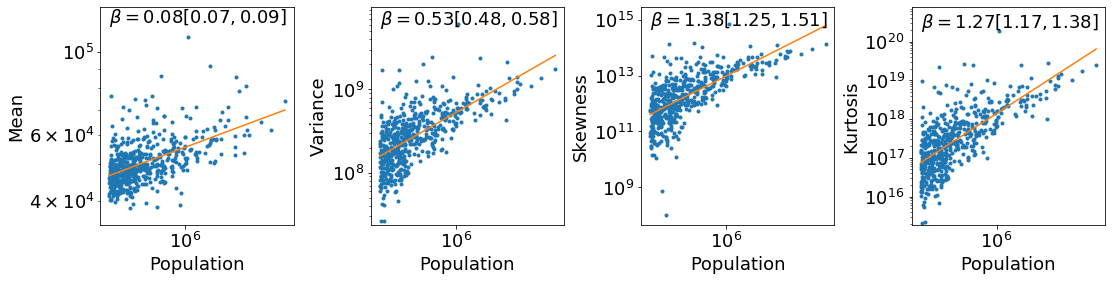

In [61]:
def plot_panel(data, xvar, yvar, offset = 0.9, ymin = 0.7, ymax = 1.2): 

    plt.loglog(data[xvar], data[yvar], ".")
    out = scalingSum(data, xvar, yvar)
    x = np.linspace(data[xvar].min(),  data[xvar].max(), 10)
    plt.loglog(x, x**out["beta"]*np.exp(out["b"]), "-")
    text = r"$\beta = {:.2f} [{:.2f}, {:.2f}]$".format(out["beta"], out["beta_l"], out["beta_u"])
    
    plt.text(data[xvar].min(), offset*data[yvar].max(), text)
    plt.ylim([data[yvar].min()*ymin, data[yvar].max()*ymax])
    return out 

plt.figure(figsize = (18, 4))

plt.subplot(1, 4, 1)
o1 = plot_panel(data, "city_pops", "mean", 1.09, ymin = 0.9, ymax = 1.2)
plt.xlabel("Population")
plt.ylabel("Mean")

plt.subplot(1, 4, 2)
o2 = plot_panel(data, "city_pops", "variance", 1, ymin = 0.9, ymax = 1.6)
plt.xlabel("Population")
plt.ylabel("Variance")

plt.subplot(1, 4, 3)
o3 = plot_panel(data, "city_pops", "skewness", 0.9, ymin = 0.9, ymax = 4)
plt.xlabel("Population")
plt.ylabel("Skewness")

plt.subplot(1, 4, 4)
o4 = plot_panel(data, "city_pops", "kurtosis", 1.2, ymin = 0.9, ymax = 4)

plt.xlabel("Population")
plt.ylabel("Kurtosis")

#plt.subplots_adjust(wspace = 0.4, hspace = 0.3)
plt.subplots_adjust(wspace = 0.4)
